In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap.umap_ as umap
from sklearn.cluster import AgglomerativeClustering
from tqdm import tqdm

In [2]:
df = pd.read_parquet('embeddings-SBERT.parquet')

In [3]:
df

Text    Label  \
0      While driverless cars present many promising b...  Machine   
1      Homework Clubs: The Key to Unlocking Academic ...  Machine   
2      "The legalization of marijuana has been a cont...  Machine   
3      Taking the opportunity to learn new things can...  Machine   
4       Working with a partner is an effective way fo...  Machine   
...                                                  ...      ...   
79995  The Battle of Lewisham took place on 8 May 180...  Machine   
79996  Asher Wright (September 7, 1803 – April 21, 18...  Machine   
79997  LimeWire is a discontinued free software peer-...  Machine   
79998  The term Diocese of Canada may refer to: \n\n1...  Machine   
79999  New tribalism is a theory by queer theorist Ju...  Machine   

                      Model Original dataset  Row in original dataset  \
0         darragh_claude_v7           essays                    13355   
1               llama2_chat           essays                     7249   
2            falcon_180b_v1           essays                     2603   
3      mistral7binstruct_v1           essays                     3993   
4      mistral7binstruct_v2           essays                     3773   
...                     ...              ...                      ...   
79995         GPT-3 (Curie)             wiki                    72827   
79996         GPT-3 (Curie)             wiki                   106421   
79997         GPT-3 (Curie)             wiki                    16338   
79998         GPT-3 (Curie)             wiki                    53934   
79999         GPT-3 (Curie)             wiki                    15362   

                                         embedding_light  \
0      [-0.0229047, 0.08687921, 0.019888217, 0.026090...   
1      [-0.02119578, -0.028534176, 0.012626177, 0.021...   
2      [0.13941133, 0.07467412, 0.0131247295, -0.0430...   
3      [-0.0354803, 0.005210507, 0.013692067, 0.04516...   
4      [-0.06940715, 0.047554933, 0.03059095, 0.00423...   
...                                                  ...   
79995  [-0.018983888, 0.055596236, 0.09209856, -0.051...   
79996  [-0.044411767, -0.025749583, 0.06759058, 0.037...   
79997  [-0.03829343, -0.047044724, 0.02926917, 0.0428...   
79998  [0.09932184, 0.0069934065, 0.011991154, 0.0069...   
79999  [-0.028909607, -0.029831419, -0.068029754, 0.0...   

                                          embedding_full  
0      [-0.015085863, 0.02961129, -0.008236221, 0.003...  
1      [0.02044188, 0.023948455, 0.0008347047, 0.0031...  
2      [-0.010192346, 0.12589885, 0.032203812, 0.0045...  
3      [0.0003891297, -0.0013969073, -0.013199714, -0...  
4      [0.038683362, 0.020366993, -0.02159926, 0.0061...  
...                                                  ...  
79995  [-0.022311112, -0.007997966, -0.00013130085, 0...  
79996  [-0.014550908, 0.058467265, 0.01256144, 0.0093...  
79997  [0.010129064, -0.026066313, 0.01603711, -0.020...  
79998  [0.005560366, 0.046509717, -0.0043199104, -0.0...  
79999  [0.0047951313, 0.040895276, 0.00773129, -0.022...  

[80000 rows x 7 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Text                     80000 non-null  object
 1   Label                    80000 non-null  object
 2   Model                    80000 non-null  object
 3   Original dataset         80000 non-null  object
 4   Row in original dataset  80000 non-null  int64 
 5   embedding_light          80000 non-null  object
 6   embedding_full           80000 non-null  object
dtypes: int64(1), object(6)
memory usage: 4.3+ MB


In [7]:
df.loc[0:3,'embedding_light']

0    [-0.0229047, 0.08687921, 0.019888217, 0.026090...
1    [-0.02119578, -0.028534176, 0.012626177, 0.021...
2    [0.13941133, 0.07467412, 0.0131247295, -0.0430...
3    [-0.0354803, 0.005210507, 0.013692067, 0.04516...
Name: embedding_light, dtype: object

In [8]:
print(df.loc[0, 'embedding_light'])

[-2.29046997e-02  8.68792087e-02  1.98882166e-02  2.60901824e-02
  3.21368314e-02  4.83332686e-02  7.43990093e-02  1.08748756e-01
 -8.19985941e-02  1.58171155e-04  9.49921161e-02  4.48821709e-02
  1.10070728e-01 -9.07749124e-03 -1.94243826e-02 -3.85725647e-02
  2.20594686e-02 -3.24482061e-02 -2.38010287e-02  6.34760261e-02
 -6.71789199e-02  3.23571684e-03 -5.64883091e-03  6.60692602e-02
 -1.37649834e-01 -3.59569141e-03 -8.40147063e-02 -7.75359273e-02
 -1.38653256e-02 -2.52250079e-02  4.81396019e-02  3.07016745e-02
  4.92609181e-02 -1.88161638e-02 -4.82148044e-02 -1.45327732e-01
  8.18299726e-02 -3.80188823e-02 -3.10069174e-02 -7.80394375e-02
 -5.97526766e-02 -1.25613481e-01 -3.32359299e-02 -6.77627092e-03
  1.77782569e-02 -3.37548070e-02  5.04164845e-02 -7.65704587e-02
  5.67305461e-02 -1.08114265e-01 -2.89969649e-02  3.43465842e-02
  8.89562294e-02 -7.28034377e-02 -3.44767049e-02 -5.87655529e-02
 -1.89352408e-02  4.69902270e-02 -4.43031192e-02  6.97044935e-03
  4.68447134e-02 -4.52844

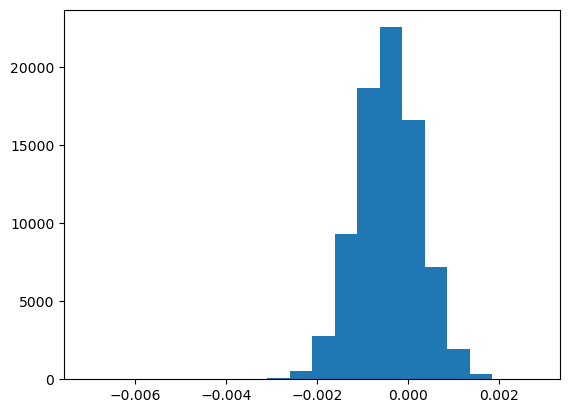

In [9]:
plt.hist(df['embedding_light'].apply(lambda x: x.mean()), bins = 20)
plt.show()

In [11]:
human = df[df['Label'] == 'Human']
machine = df[df['Label'] == 'Machine']

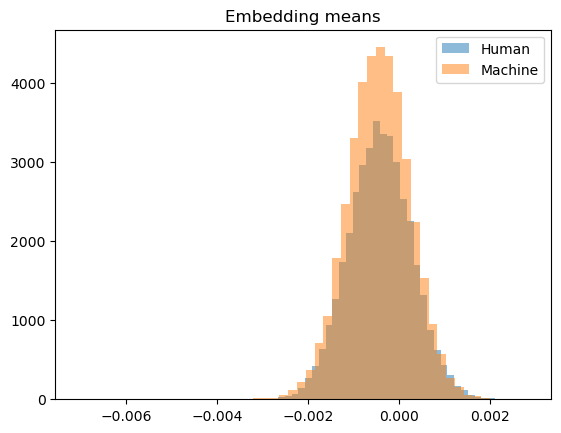

In [12]:
plt.hist(human['embedding_light'].apply(lambda x: x.mean()), bins = 50, alpha = 0.5, label = 'Human')
plt.hist(machine['embedding_light'].apply(lambda x: x.mean()), bins = 50, alpha = 0.5, label = 'Machine')
plt.legend()
plt.title("Embedding means")
plt.show()

In [14]:
# Check lengths of vectors, they're all 1
df['length'] = df['embedding_light'].apply(lambda x: (x**2).sum())
df['length'].value_counts()

length
1.0    46665
1.0    12900
1.0     9509
1.0     9268
1.0      850
1.0      684
1.0      124
Name: count, dtype: int64

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA(n_components = 2)

In [17]:
pca_2dim = pca.fit_transform(np.array(list(df['embedding_light'])))

In [18]:
df['pca_x'] = pca_2dim[:,0]
df['pca_y'] = pca_2dim[:,1]

In [19]:
human = df[df['Label'] == 'Human']
machine = df[df['Label'] == 'Machine']

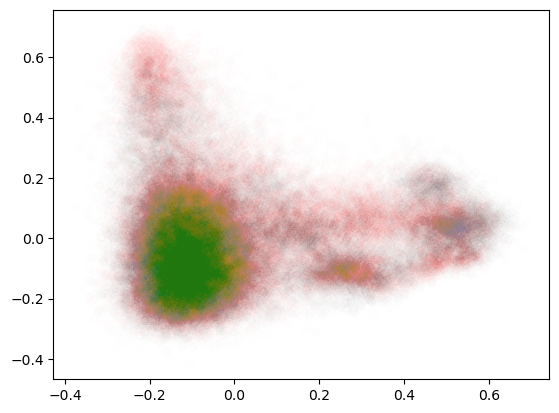

In [20]:
a = 0.005
plt.scatter(human['pca_x'], human['pca_y'], alpha = a)
plt.scatter(machine['pca_x'], machine['pca_y'], alpha = a)
plt.show()

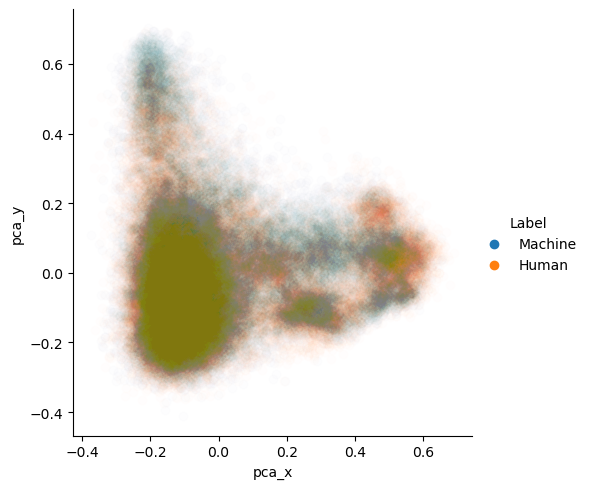

In [21]:
g = sns.lmplot(data = df, x = 'pca_x', y = 'pca_y', hue = 'Label', scatter_kws = {'alpha':0.008},fit_reg = False)
for lh in g._legend.legend_handles: 
    lh.set_alpha(1)
plt.show()

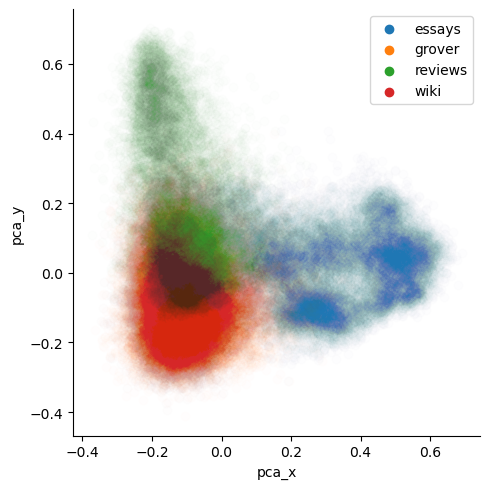

In [22]:
sns.lmplot(data = df, x = 'pca_x', y = 'pca_y', hue = 'Original dataset', scatter_kws = {'alpha':0.008},fit_reg = False, legend = False)
leg = plt.legend()
for lh in leg.legend_handles: 
    lh.set_alpha(1)
plt.show()

In [23]:
tsne = TSNE(n_components=2)

In [24]:
tsne_2d = tsne.fit_transform(np.array(list(df['embedding_light'])))

In [25]:
df['tsne_x'] = tsne_2d[:,0]
df['tsne_y'] = tsne_2d[:,1]

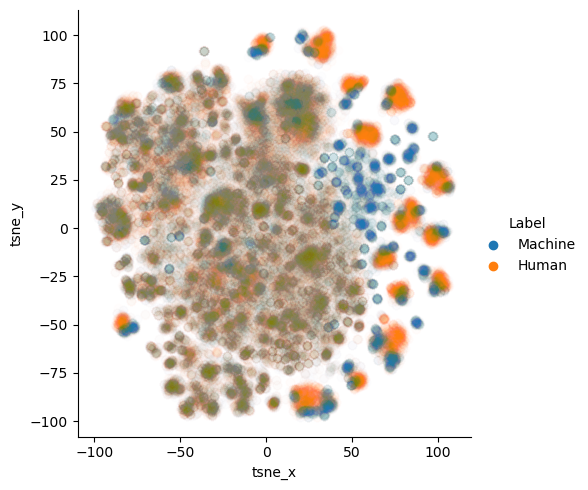

In [26]:
g = sns.lmplot(data = df, x = 'tsne_x', y = 'tsne_y', hue = 'Label', scatter_kws = {'alpha':0.008},fit_reg = False)
for lh in g._legend.legend_handles: 
    lh.set_alpha(1)
plt.show()

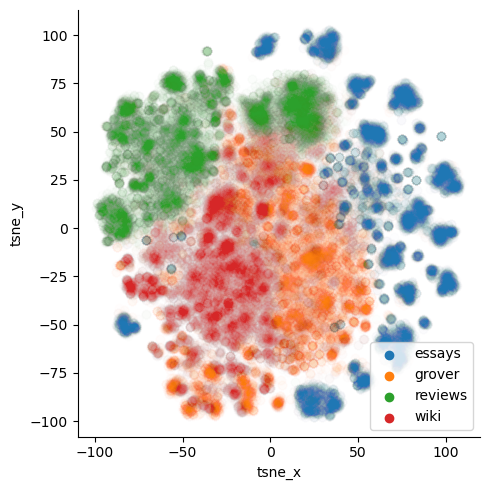

In [27]:
sns.lmplot(data = df, x = 'tsne_x', y = 'tsne_y', hue = 'Original dataset', scatter_kws = {'alpha':0.008},fit_reg = False, legend = False)
leg = plt.legend()
for lh in leg.legend_handles: 
    lh.set_alpha(1)
plt.show()

In [29]:
umap_2d = umap.UMAP().fit_transform(np.array(list(df['embedding_light'])))

In [30]:
df['umap_x'] = umap_2d[:,0]
df['umap_y'] = umap_2d[:,1]

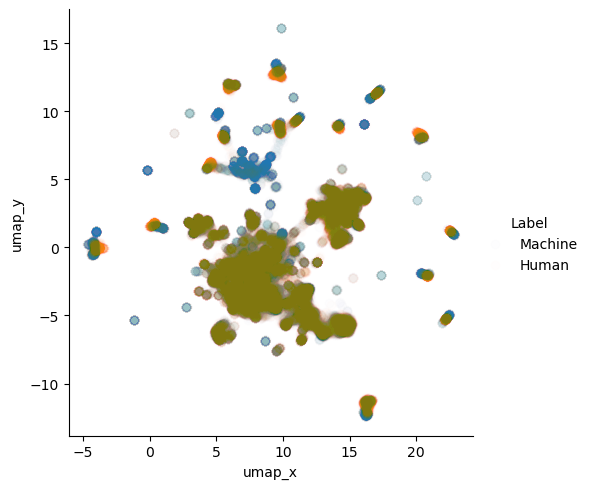

In [31]:
sns.lmplot(data = df, x = 'umap_x', y = 'umap_y', hue = 'Label', scatter_kws = {'alpha':0.008},fit_reg = False)
plt.show()

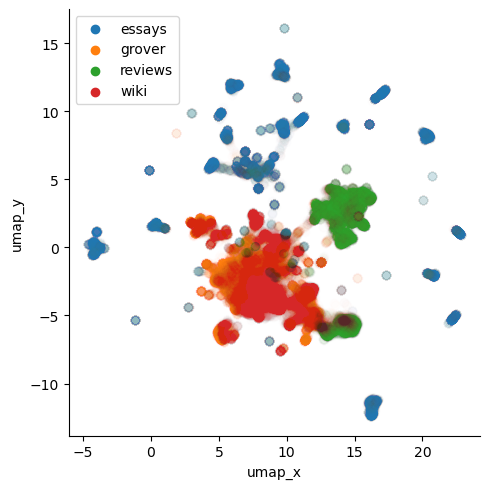

In [32]:
sns.lmplot(data = df, x = 'umap_x', y = 'umap_y', hue = 'Original dataset', scatter_kws = {'alpha':0.008},fit_reg = False, legend = False)
leg = plt.legend()
for lh in leg.legend_handles: 
    lh.set_alpha(1)
plt.show()

### Essays EDA

In [33]:
essays = df[df['Original dataset'] == 'essays']

In [34]:
essays_full = pd.read_csv("essays_balanced.csv")

In [35]:
essays = essays.set_index('Row in original dataset')

In [36]:
essays['Prompt'] = essays_full.loc[essays.index]['prompt_name']

In [37]:
essays.head()

Text  \
Row in original dataset                                                      
13355                    While driverless cars present many promising b...   
7249                     Homework Clubs: The Key to Unlocking Academic ...   
2603                     "The legalization of marijuana has been a cont...   
3993                     Taking the opportunity to learn new things can...   
3773                      Working with a partner is an effective way fo...   

                           Label                 Model Original dataset  \
Row in original dataset                                                   
13355                    Machine     darragh_claude_v7           essays   
7249                     Machine           llama2_chat           essays   
2603                     Machine        falcon_180b_v1           essays   
3993                     Machine  mistral7binstruct_v1           essays   
3773                     Machine  mistral7binstruct_v2           essays   

                                                           embedding_light  \
Row in original dataset                                                      
13355                    [-0.0229047, 0.08687921, 0.019888217, 0.026090...   
7249                     [-0.02119578, -0.028534176, 0.012626177, 0.021...   
2603                     [0.13941133, 0.07467412, 0.0131247295, -0.0430...   
3993                     [-0.0354803, 0.005210507, 0.013692067, 0.04516...   
3773                     [-0.06940715, 0.047554933, 0.03059095, 0.00423...   

                                                            embedding_full  \
Row in original dataset                                                      
13355                    [-0.015085863, 0.02961129, -0.008236221, 0.003...   
7249                     [0.02044188, 0.023948455, 0.0008347047, 0.0031...   
2603                     [-0.010192346, 0.12589885, 0.032203812, 0.0045...   
3993                     [0.0003891297, -0.0013969073, -0.013199714, -0...   
3773                     [0.038683362, 0.020366993, -0.02159926, 0.0061...   

                         length     pca_x     pca_y     tsne_x     tsne_y  \
Row in original dataset                                                     
13355                       1.0  0.191801 -0.111307  47.829189 -72.826118   
7249                        1.0  0.436702  0.111940  78.269142  20.444700   
2603                        1.0  0.328663 -0.104447  55.164398 -18.783186   
3993                        1.0  0.308874  0.095619  55.911392  18.436798   
3773                        1.0  0.379326  0.149582  63.284054  29.770571   

                            umap_x    umap_y  \
Row in original dataset                        
13355                    20.491743 -1.953530   
7249                      8.742129  8.778244   
2603                      6.571152  0.279858   
3993                      7.792962  5.524935   
3773                      7.933221  4.411842   

                                                       Prompt  
Row in original dataset                                        
13355                                         Driverless cars  
7249                     Mandatory extracurricular activities  
2603                                          Car-free cities  
3993                                          Summer projects  
3773                                          Summer projects

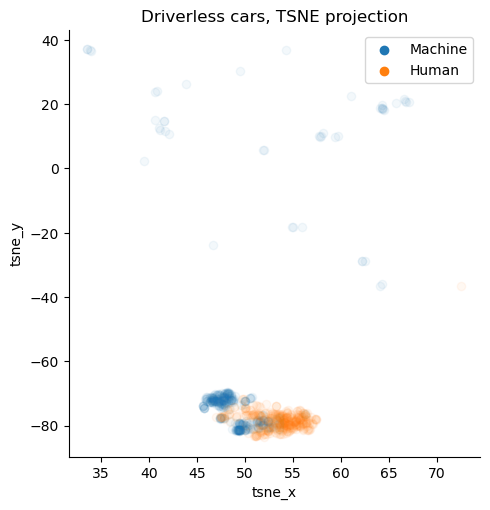

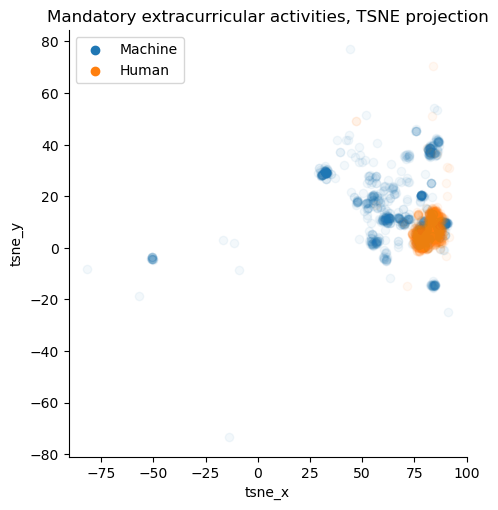

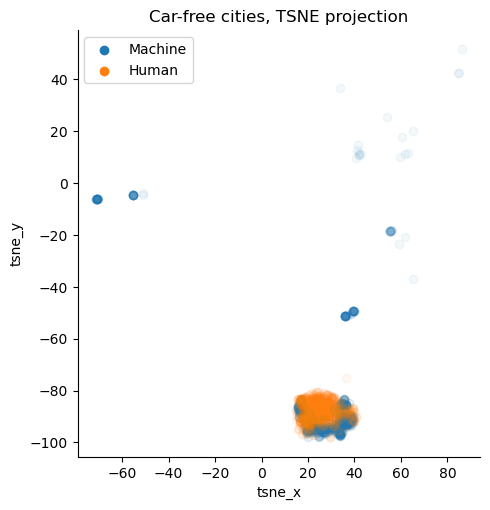

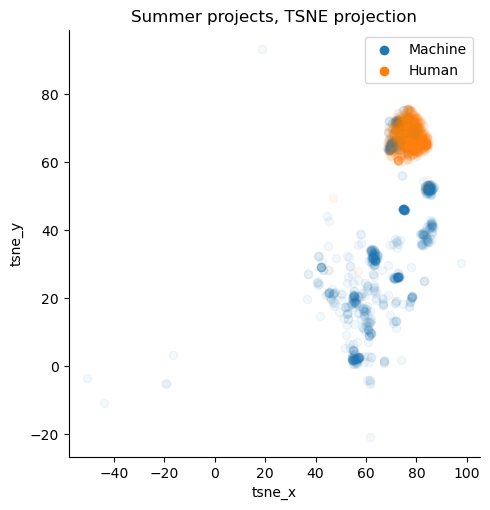

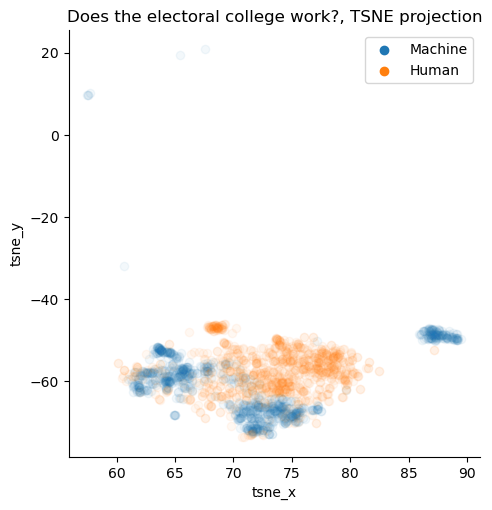

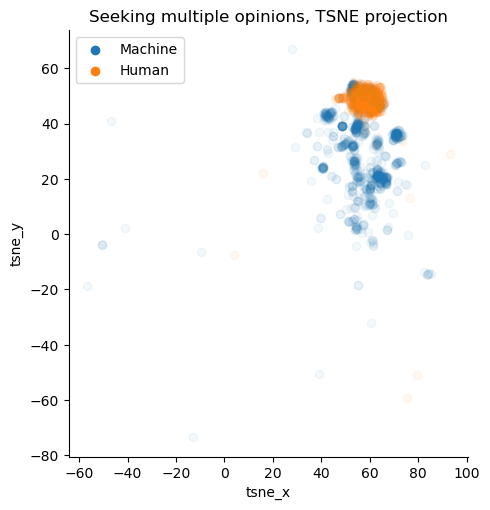

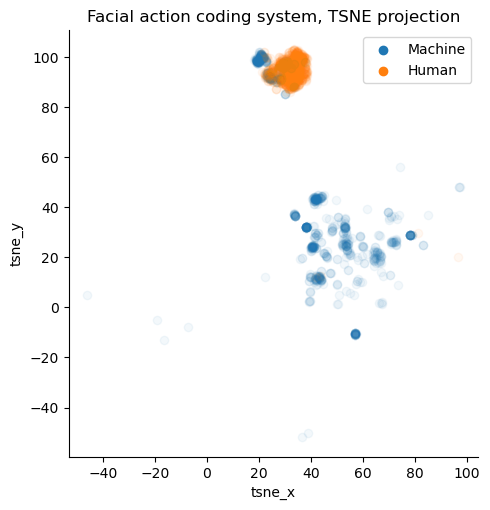

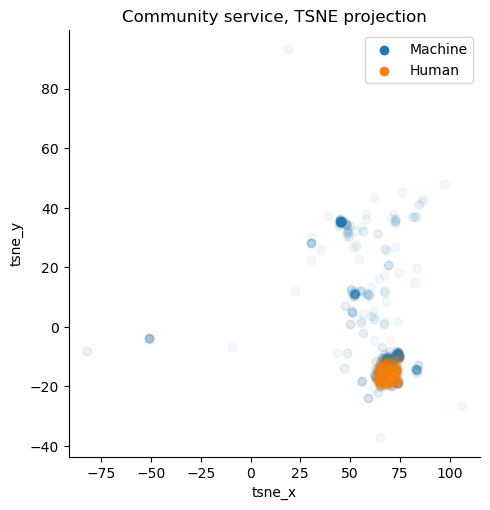

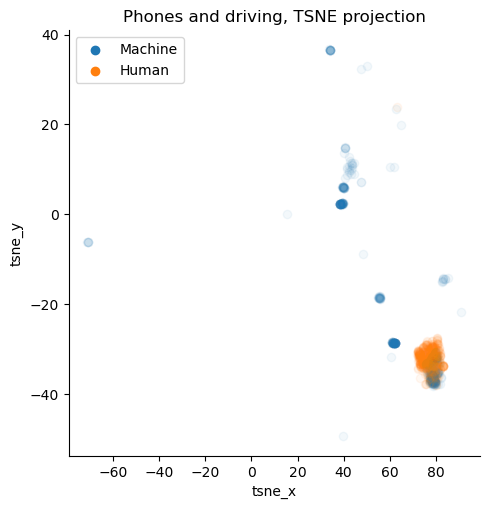

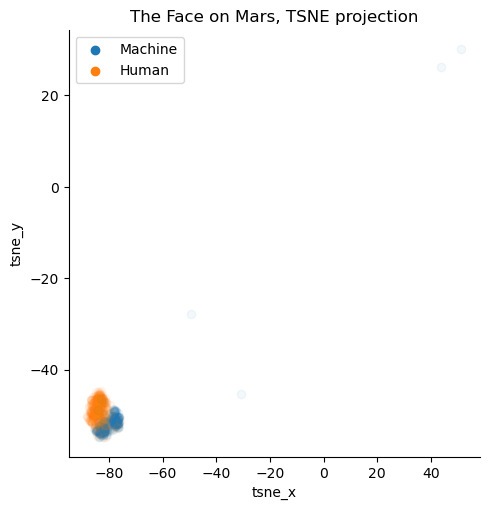

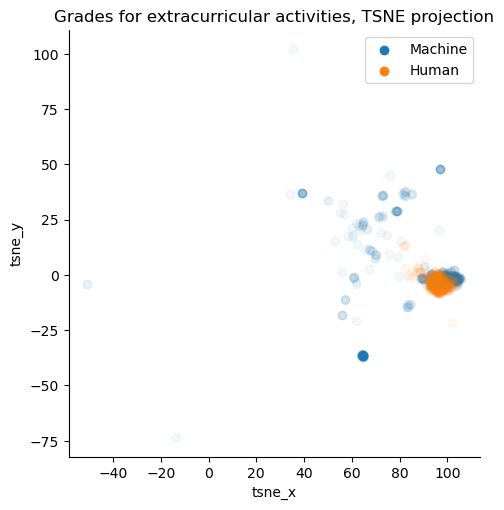

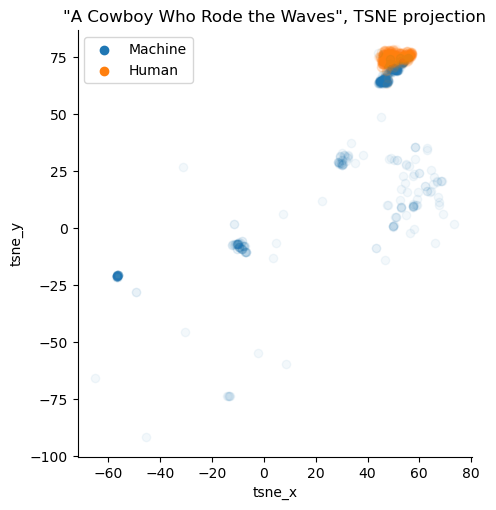

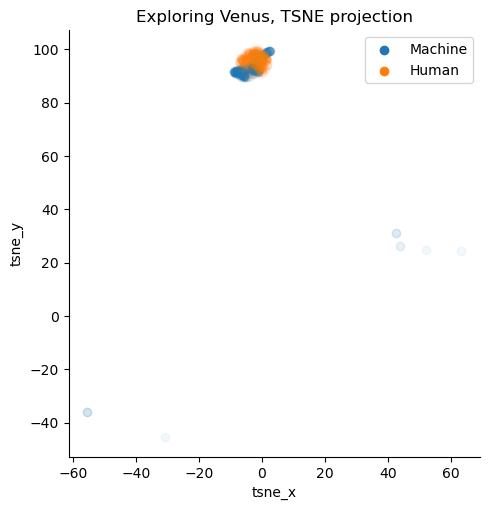

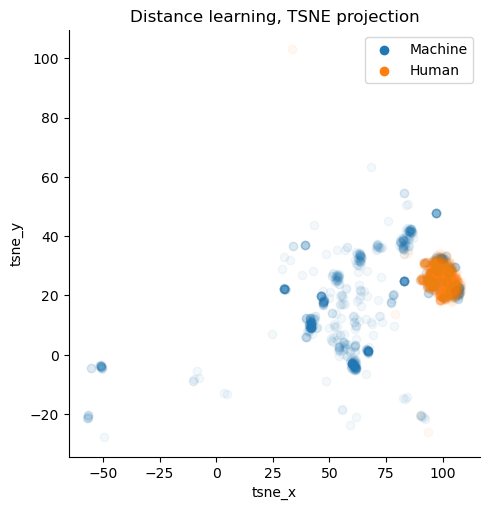

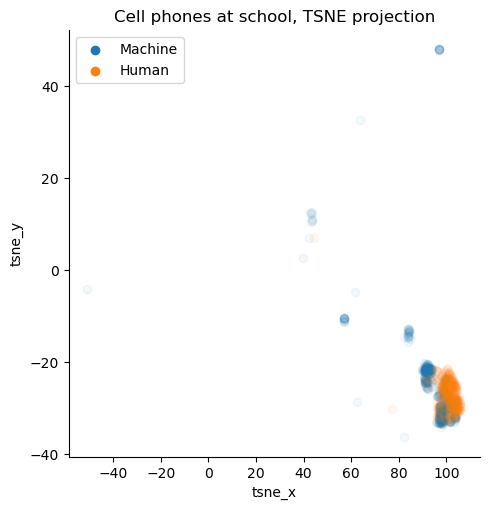

In [38]:
prompts = essays['Prompt'].unique()
for prompt in prompts:
    g = sns.lmplot(data = essays[essays['Prompt'] == prompt], x = 'tsne_x', y = 'tsne_y', hue = 'Label', scatter_kws = {'alpha':0.05},fit_reg = False, legend = False)
    leg = plt.legend()
    for lh in leg.legend_handles: 
        lh.set_alpha(1)
    g.ax.set_title(f"{prompt}, TSNE projection")
    plt.show()


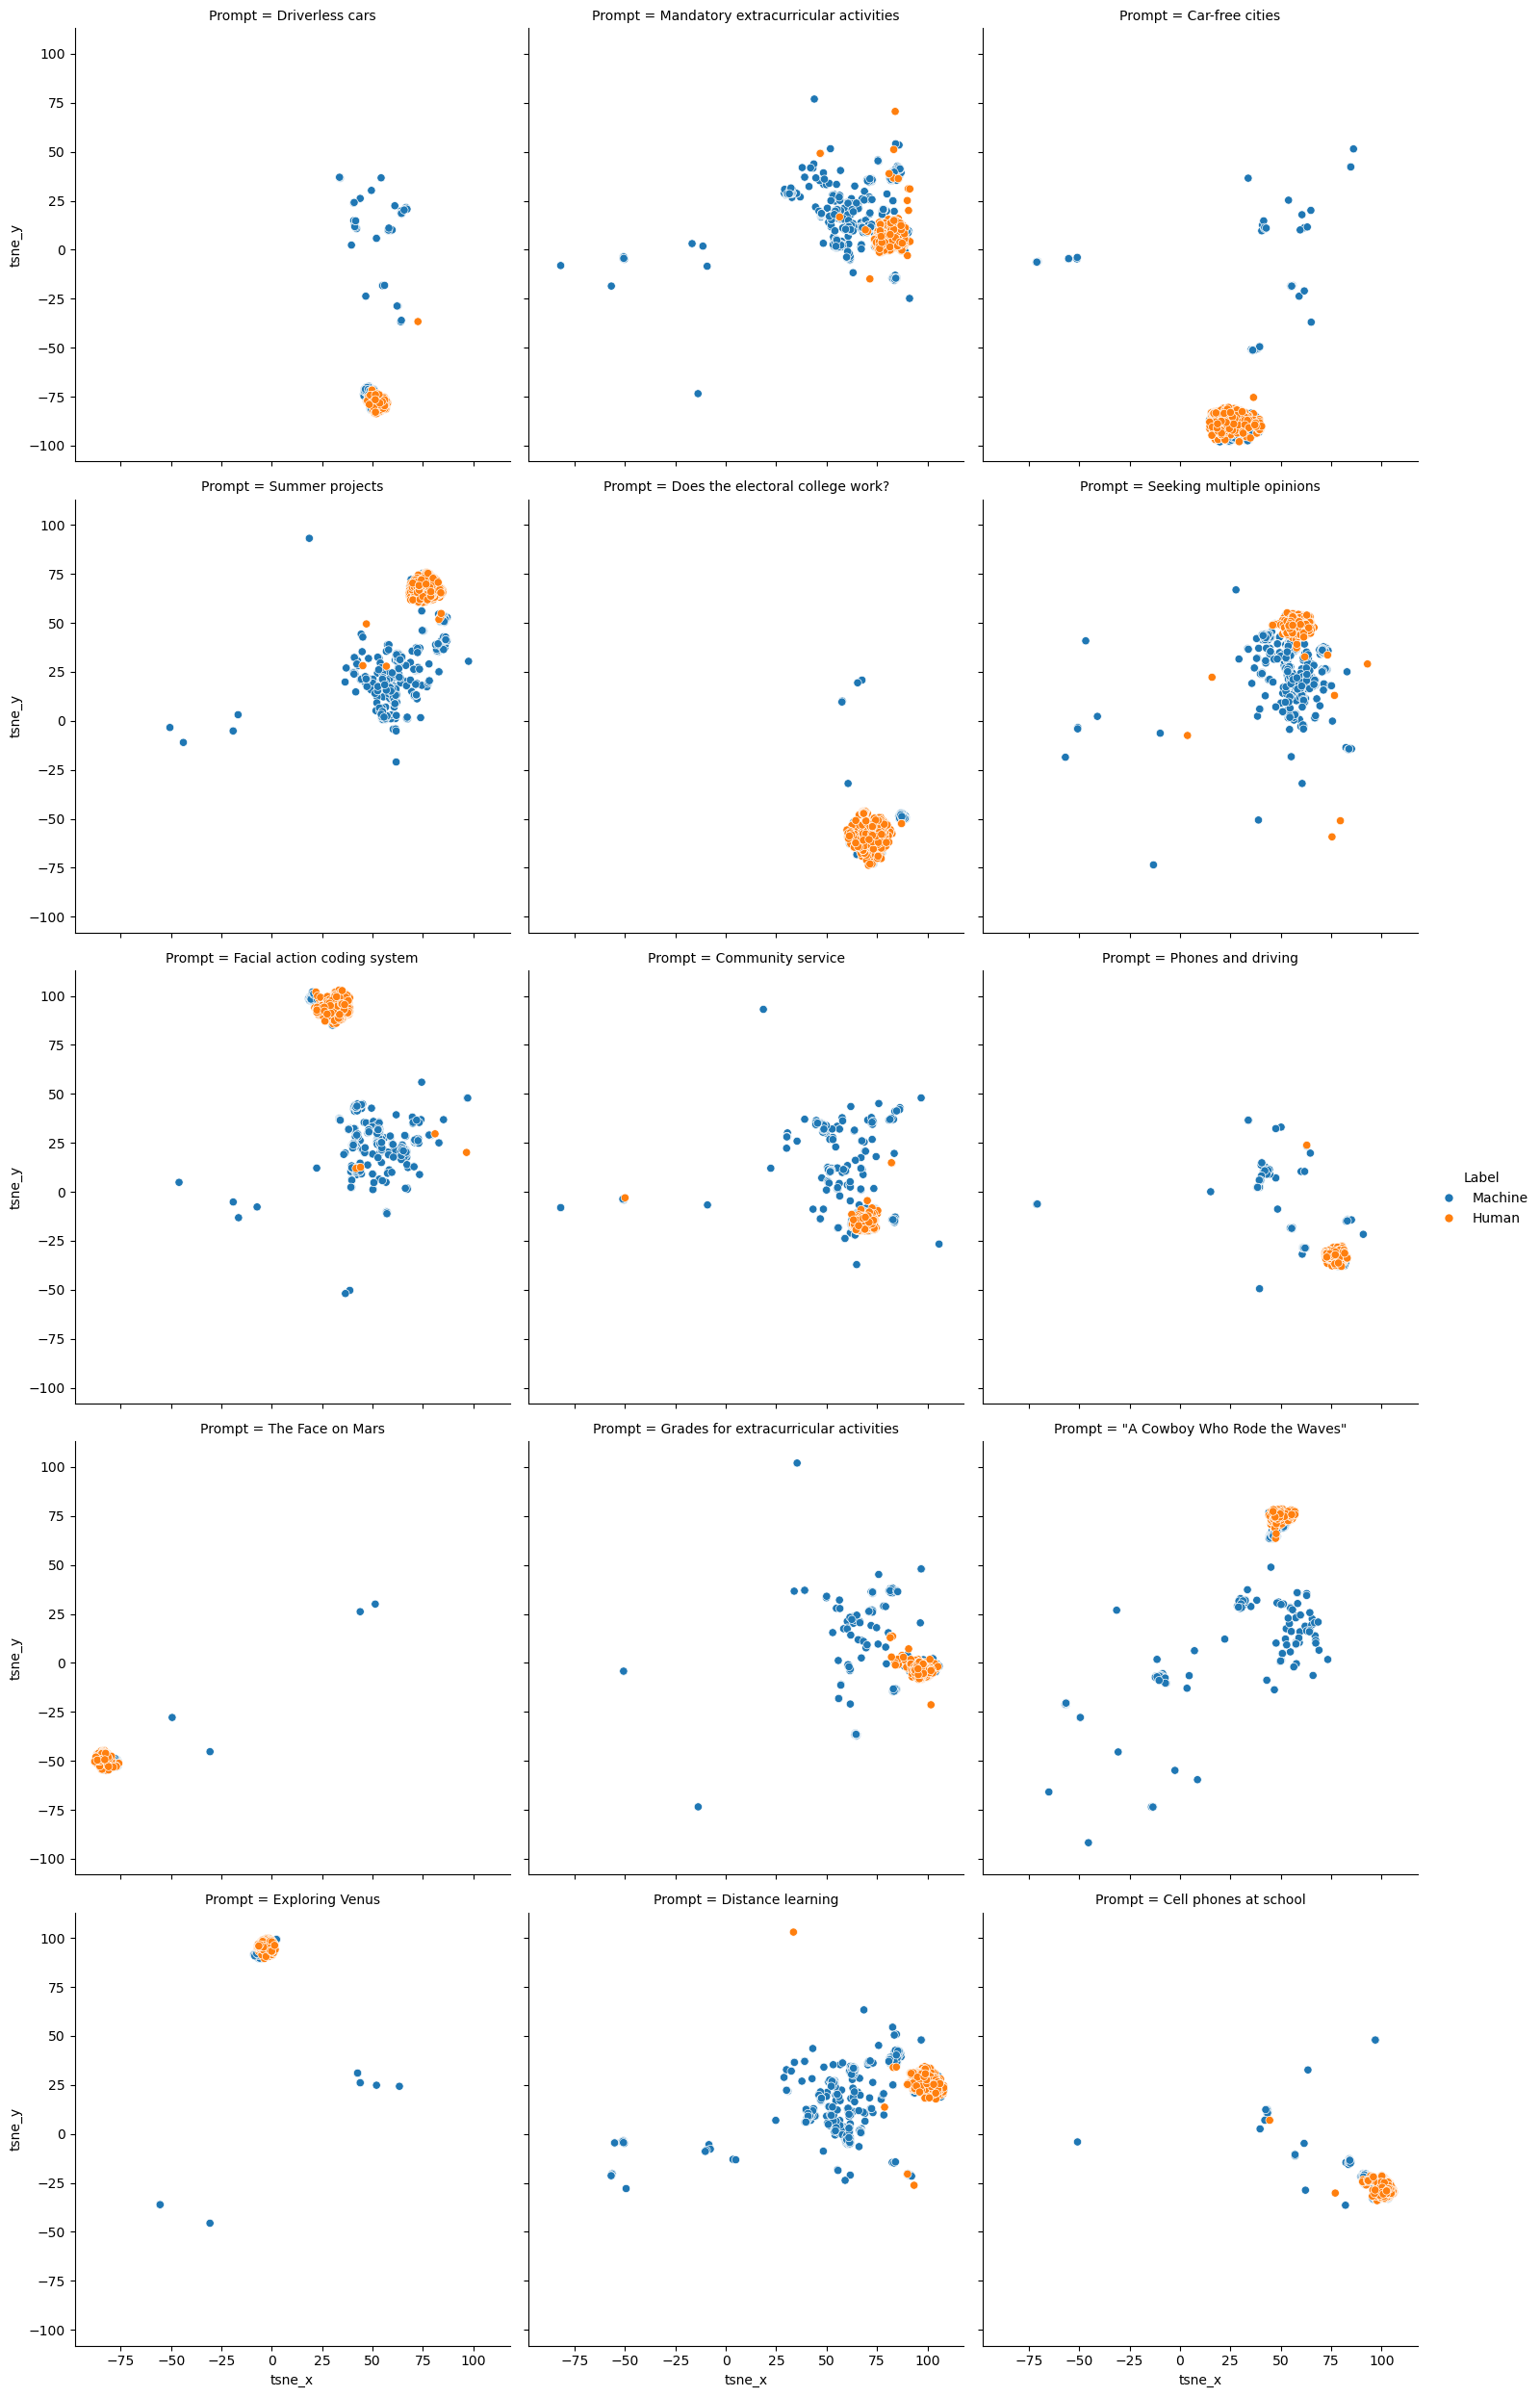

In [39]:
sns.relplot(data=essays,
              x='tsne_x',
              y='tsne_y',
              kind='scatter',
            hue = 'Label',
              col='Prompt',
              col_wrap=3)
plt.savefig('embeddings.png')
plt.show()

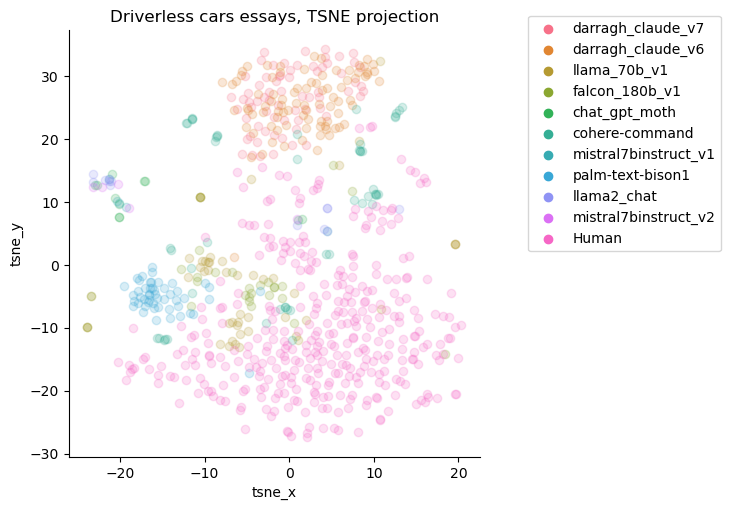

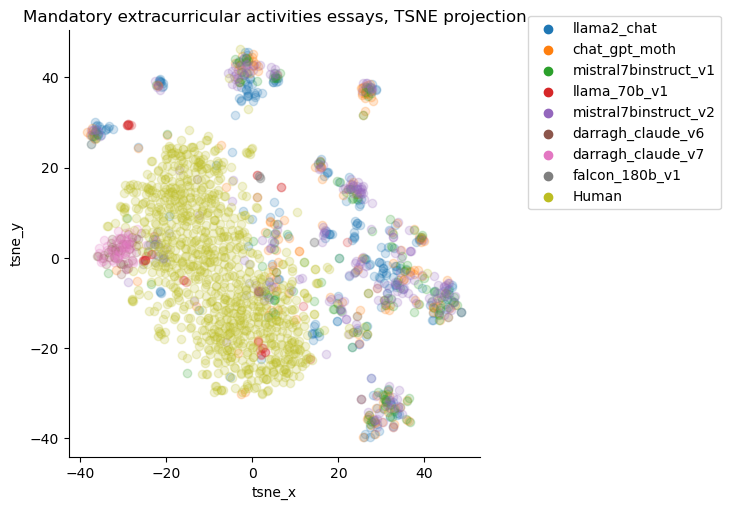

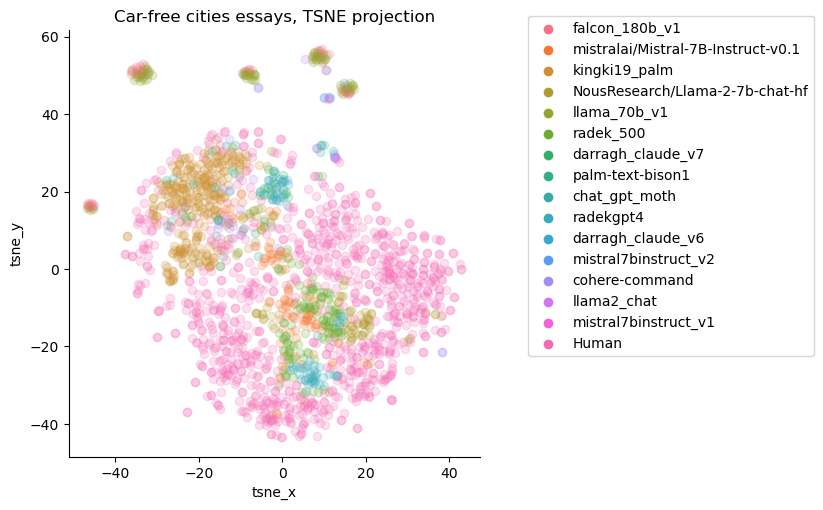

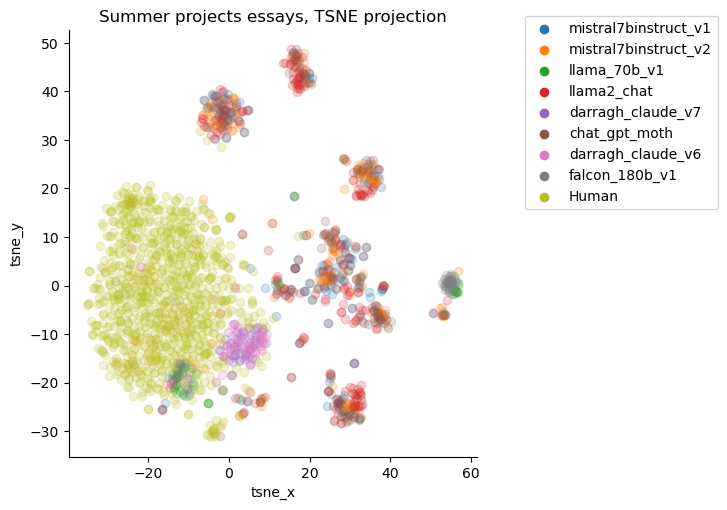

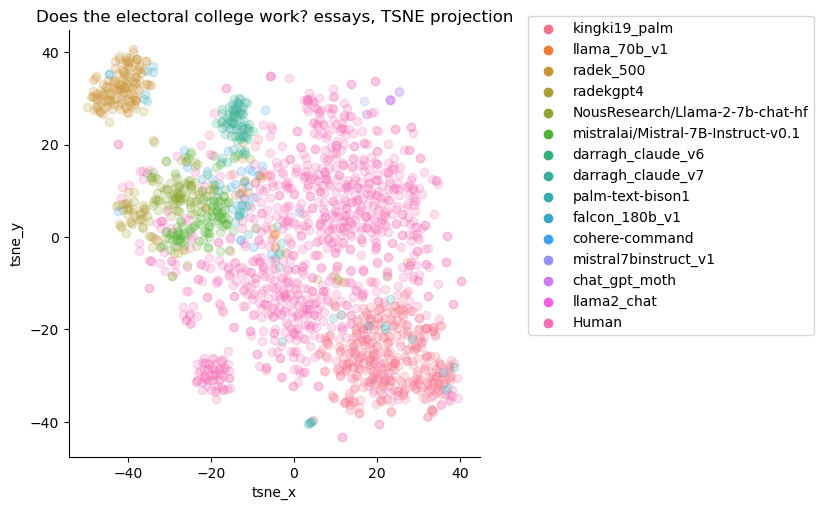

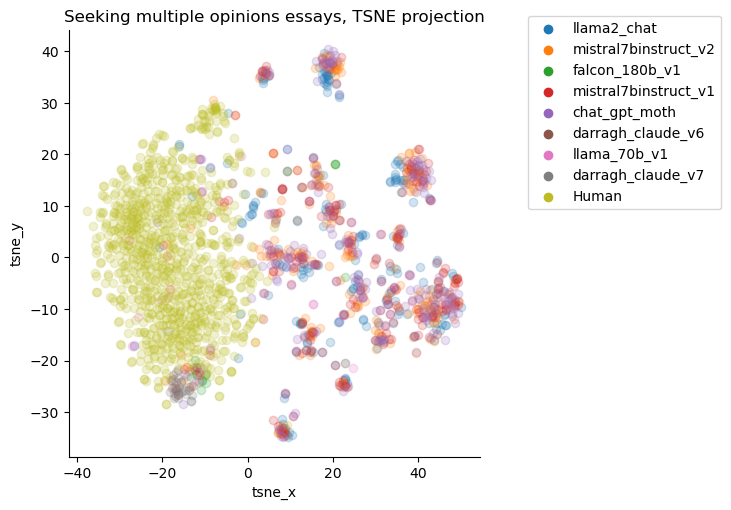

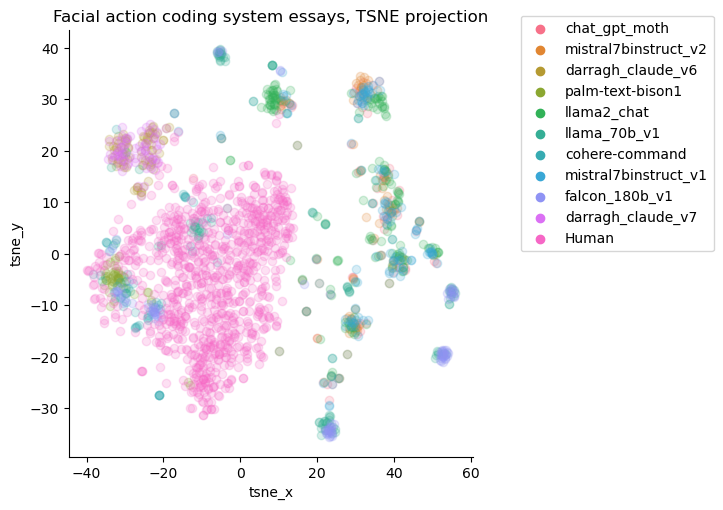

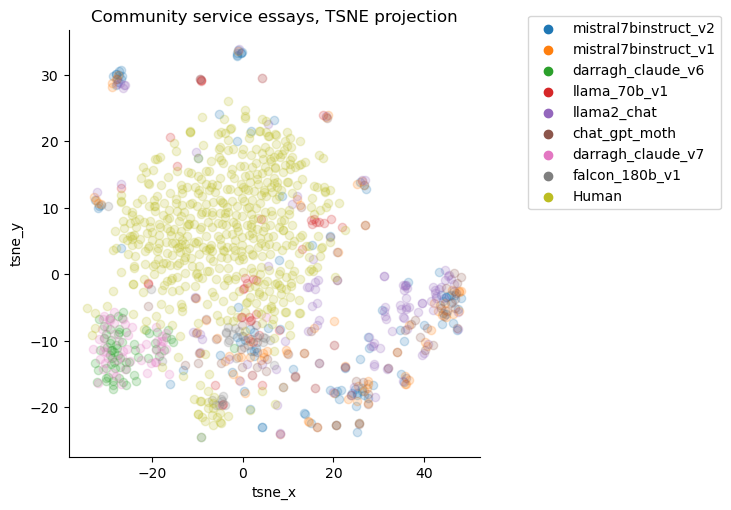

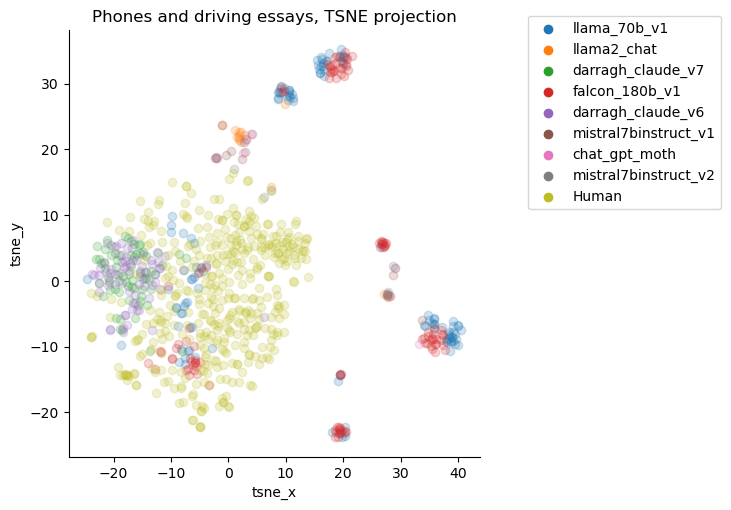

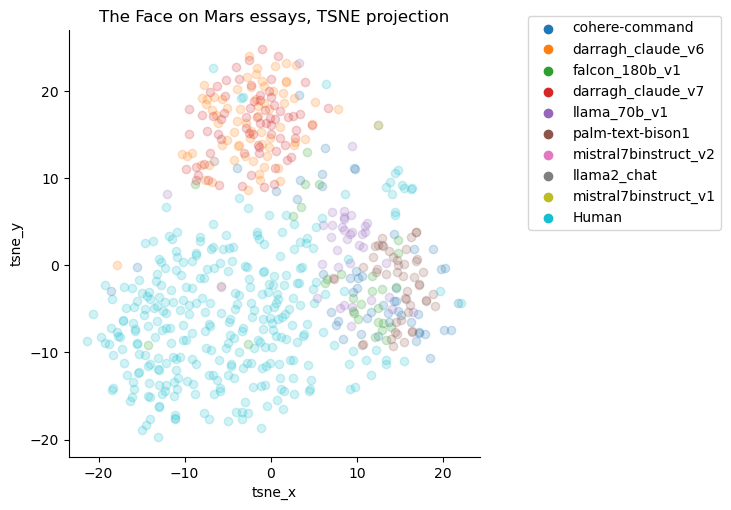

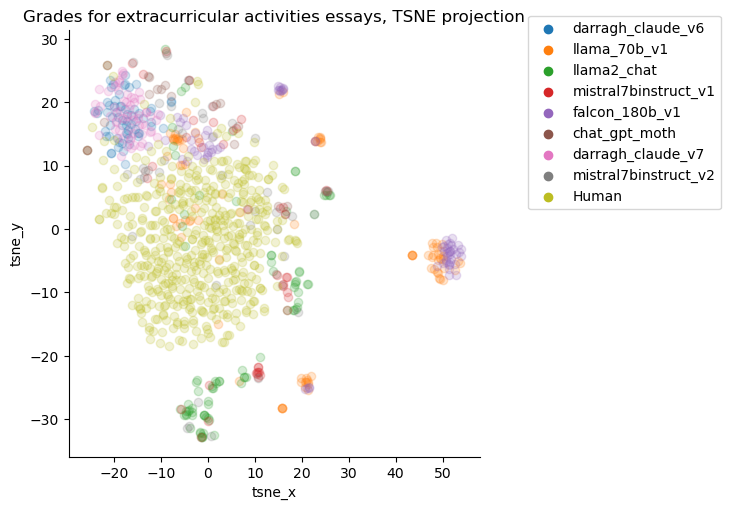

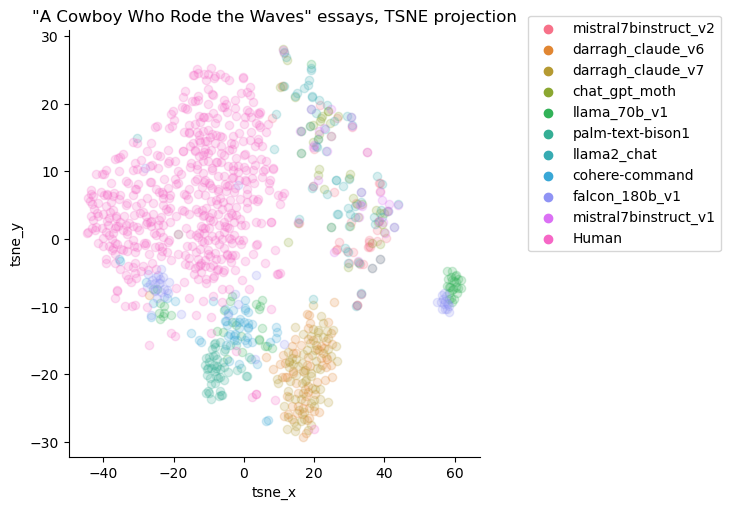

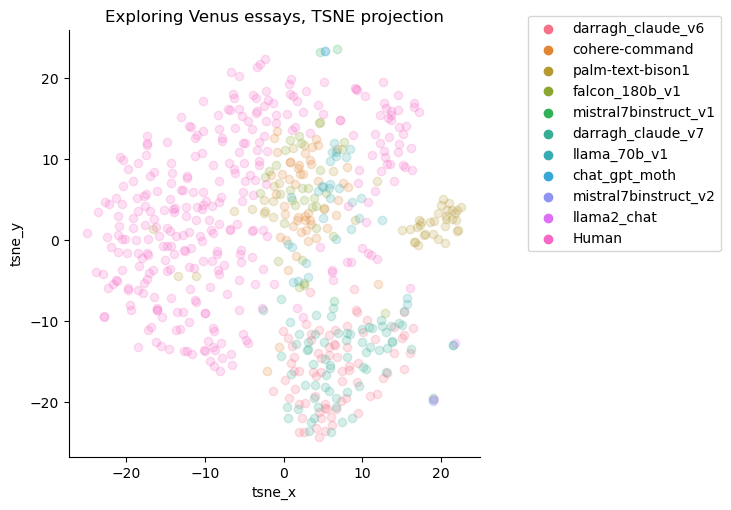

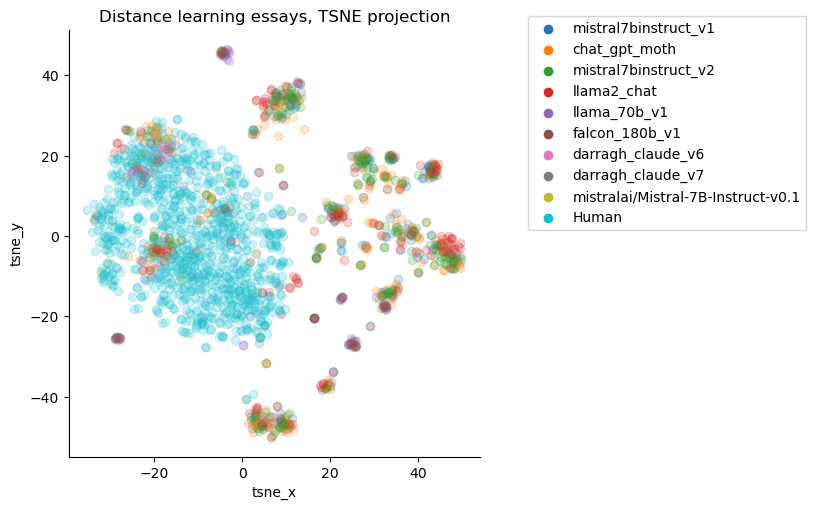

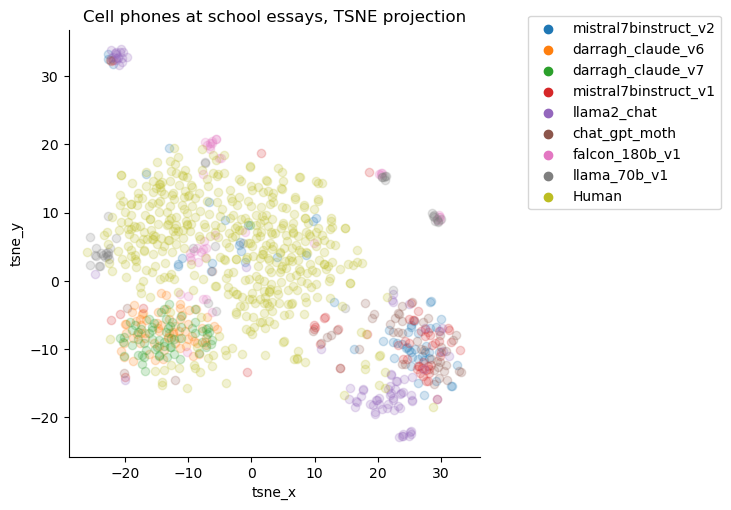

In [43]:
prompts = essays['Prompt'].unique()
for prompt in prompts:
    df_ = essays[essays['Prompt'] == prompt]
    tsne_2d = tsne.fit_transform(np.array(list(df_['embedding_light'])))
    df_.loc[:,'tsne_x'] = tsne_2d[:,0]
    df_.loc[:,'tsne_y'] = tsne_2d[:,1]
    g = sns.lmplot(data = df_, x = 'tsne_x', y = 'tsne_y', hue = 'Model', scatter_kws = {'alpha':0.2},fit_reg = False, legend = False)
    leg = plt.legend()
    leg = g.ax.legend(bbox_to_anchor=(1.1, 1.05))
    for lh in leg.legend_handles: 
        lh.set_alpha(1)
    g.ax.set_title(f"{prompt} essays, TSNE projection")
    plt.savefig(f"{prompt} essays, TSNE projection.png")
    plt.show()


In [5]:
for i, emb in enumerate(df.head(10)['embedding']):
    print(i, emb)

0 [ 0.004493    0.02276886 -0.03793382 ... -0.008955    0.01749892
 -0.03139916]
1 [ 0.00424831  0.01757416 -0.01089881 ... -0.02378551 -0.03385482
 -0.00736107]
2 [ 0.0006997  -0.00850186  0.00326279 ... -0.00072259 -0.02708342
 -0.02136195]
3 [ 0.00265385  0.00892459 -0.04195874 ... -0.00965736 -0.01161193
  0.00368392]
4 [ 0.01435416  0.01518405 -0.03111409 ...  0.0011569   0.00419939
 -0.00197372]
5 [-0.01868762  0.04723905 -0.01976407 ... -0.00369571 -0.01636536
 -0.00657937]
6 [ 0.00242281 -0.01065337 -0.00997738 ... -0.03720292  0.02173678
 -0.01868463]
7 [ 0.02709153  0.02145632  0.01229524 ...  0.00542329 -0.00833364
  0.01328314]
8 [-0.01504984  0.00575627 -0.01112353 ...  0.00386548 -0.00036045
 -0.03673474]
9 [-0.02871262 -0.00193721 -0.02121621 ...  0.01088041  0.00974004
 -0.02722403]


In [8]:
df.head(10).loc[0, ['Text', 'embedding']]

Text         While driverless cars present many promising b...
embedding    [0.0044930046, 0.02276886, -0.03793382, 0.0088...
Name: 0, dtype: object

In [9]:
df.loc[0,'Text']

'While driverless cars present many promising benefits, I believe serious concerns remain about their widespread adoption. As the article outlines, proponents argue these vehicles could reduce traffic accidents by taking the human error element out of driving. However, the technology is still in development and many questions about safety and liability in malfunctions need to be addressed first.  \n\nA key benefit mentioned is that over 90% of car accidents are caused by human error. With computers controlling the driving, accidents could decline significantly as the machines would not become distracted, drunk, or tired. However, software and sensors are not perfect either. Unpredictable situations may arise where the cars do not react appropriately or technology fails. Until the technology is proven to handle any scenario in a fail-safe manner, lives could still be at risk.\n\nThe article also notes driverless cars could allow the elderly and disabled greater independence and mobility